In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [34]:
df=pd.read_csv('Orders_data.csv')
df.head(20)

,Order ID,Order Date,customer_id,CustomerName,State,City,order_total,Product cost,Category
0,1,10-03-2018,1,Harivansh,Uttar Pradesh,Mathura,2599,1145,Phones
1,2,03-02-2018,3,Madhav,Madhya Pradesh,Indore,2599,1145,Phones
2,3,24-01-2018,5,Madan Mohan,Himachal Pradesh,Simla,2599,1145,Tables
3,4,27-12-2018,7,Gopal,Himachal Pradesh,Simla,2599,1145,Phones
4,5,21-08-2018,9,Vishakha,Nagaland,Kohima,2599,2291,Phones
5,6,21-01-2018,11,Sudevi,West Bengal,Kolkata,2599,1145,Clothes
6,7,16-01-2018,13,Shiva,Maharashtra,Mumbai,2599,1145,Clothes
7,8,27-03-2018,15,Sarita,Nagaland,Kohima,2599,1145,Shoes
8,9,01-10-2018,17,Shishu,Nagaland,Kohima,2599,1145,Phones
9,10,01-04-2018,19,Vrinda,Maharashtra,Pune,2599,1017,Laptop


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    int64 
 1   Order Date    500 non-null    object
 2   customer_id   500 non-null    int64 
 3   CustomerName  500 non-null    object
 4   State         500 non-null    object
 5   City          500 non-null    object
 6   order_total   500 non-null    int64 
 7   Product cost  500 non-null    int64 
 8   Category      500 non-null    object
dtypes: int64(4), object(5)
memory usage: 35.3+ KB


In [36]:
df.columns

Index(['Order ID', 'Order Date', 'customer_id', 'CustomerName', 'State',
       'City', 'order_total', 'Product cost', 'Category'],
      dtype='object')

In [37]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [38]:
df.isnull()

,Order ID,Order Date,customer_id,CustomerName,State,City,order_total,Product cost,Category
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [39]:
df['Order ID'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Order ID, Length: 500, dtype: bool

In [40]:
df['Order Date'].describe()

count            500
unique           307
top       24-11-2018
freq               7
Name: Order Date, dtype: object

In [41]:
df.describe()

,Order ID,customer_id,order_total,Product cost
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,138.824000,2261.484000,954.840000
std,144.481833,87.197292,228.831557,426.104086
min,1.000000,1.000000,1749.000000,339.000000
25%,125.750000,63.000000,2049.000000,774.000000
50%,250.500000,131.000000,2399.000000,900.000000
75%,375.250000,215.000000,2399.000000,953.000000
max,500.000000,297.000000,2599.000000,5403.000000


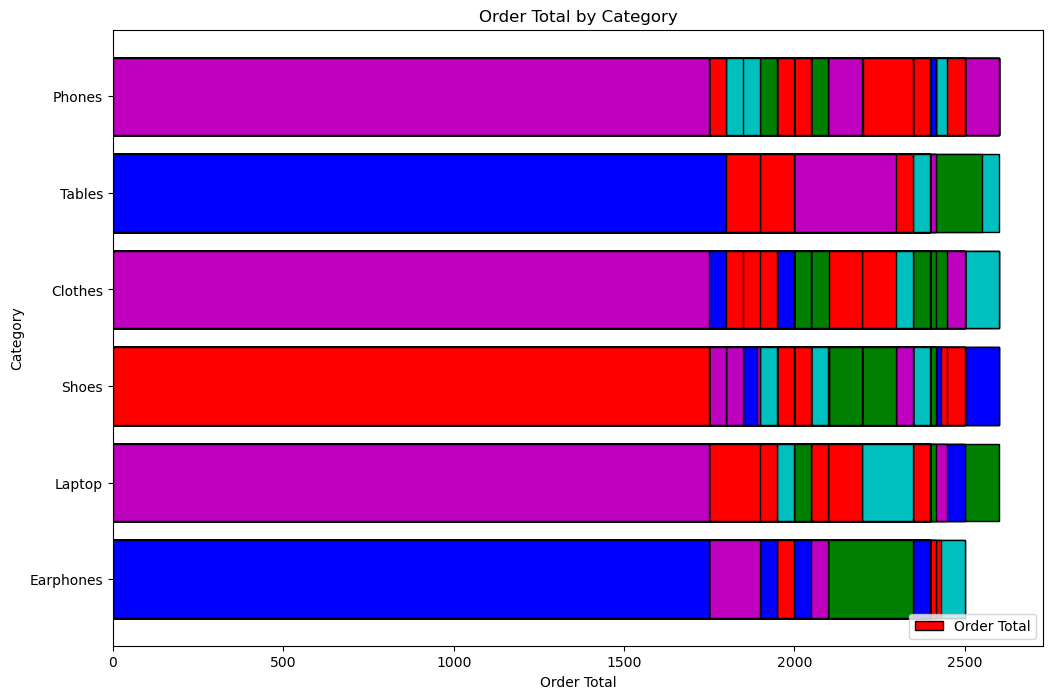

In [70]:
cl=['r','b','c','g','r','m']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(df['Category'], df['order_total'], color=cl , edgecolor='black')
plt.xlabel('Order Total')
plt.ylabel('Category')
plt.title('Order Total by Category')
plt.legend(['Order Total'])
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.show()


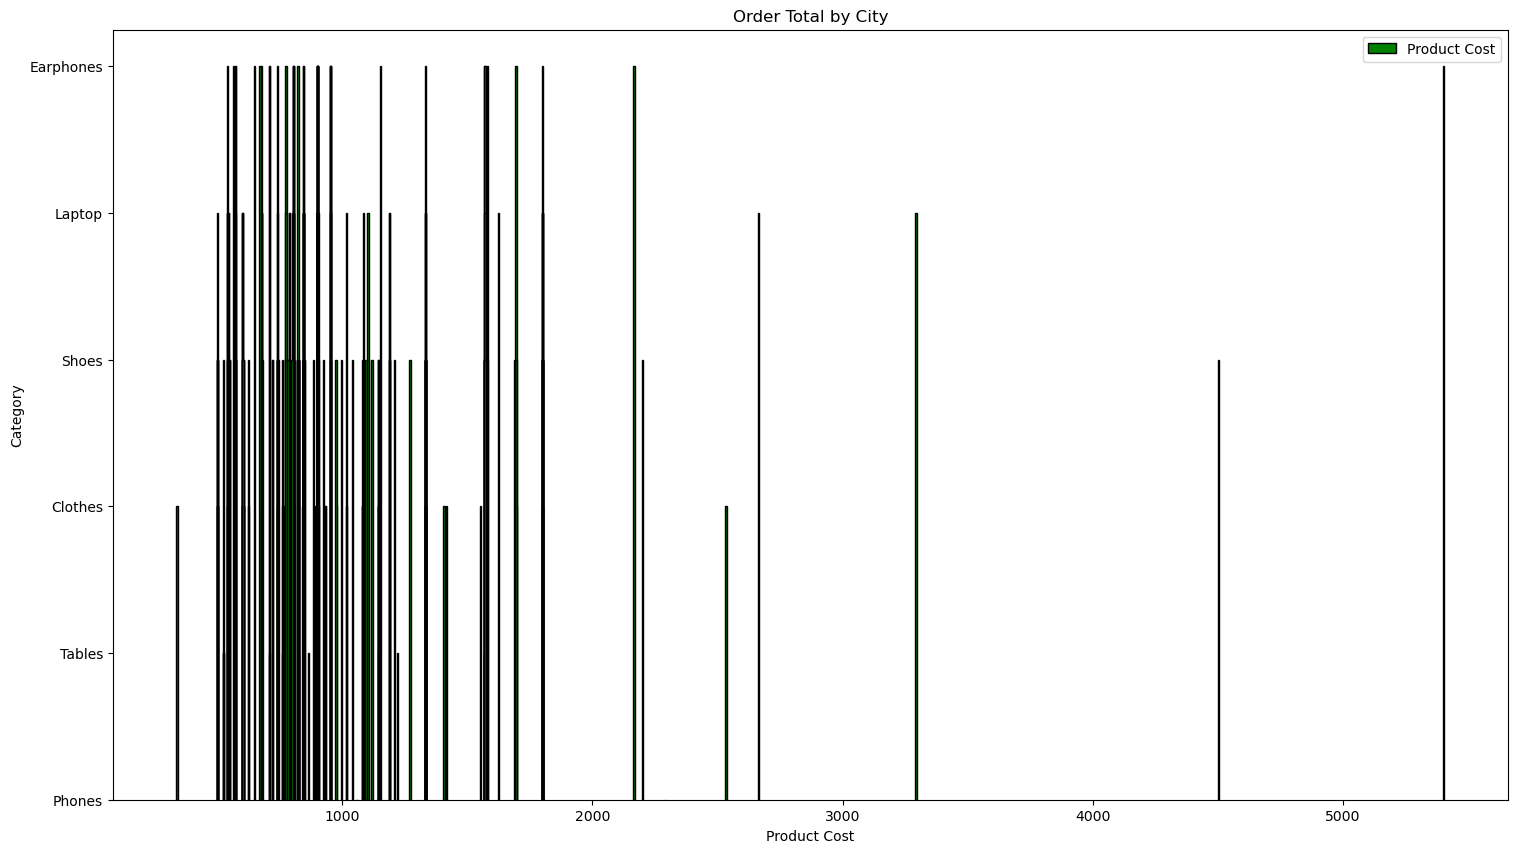

In [80]:
# Create a horizontal bar plot
plt.figure(figsize=(18, 10))
plt.bar(df['Product cost'], df['Category'], color='green', edgecolor='black',width=5)
plt.xlabel('Product Cost')
plt.ylabel('Category',color='black')
plt.title('Order Total by City')
plt.legend(['Product Cost'])
# plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.show()

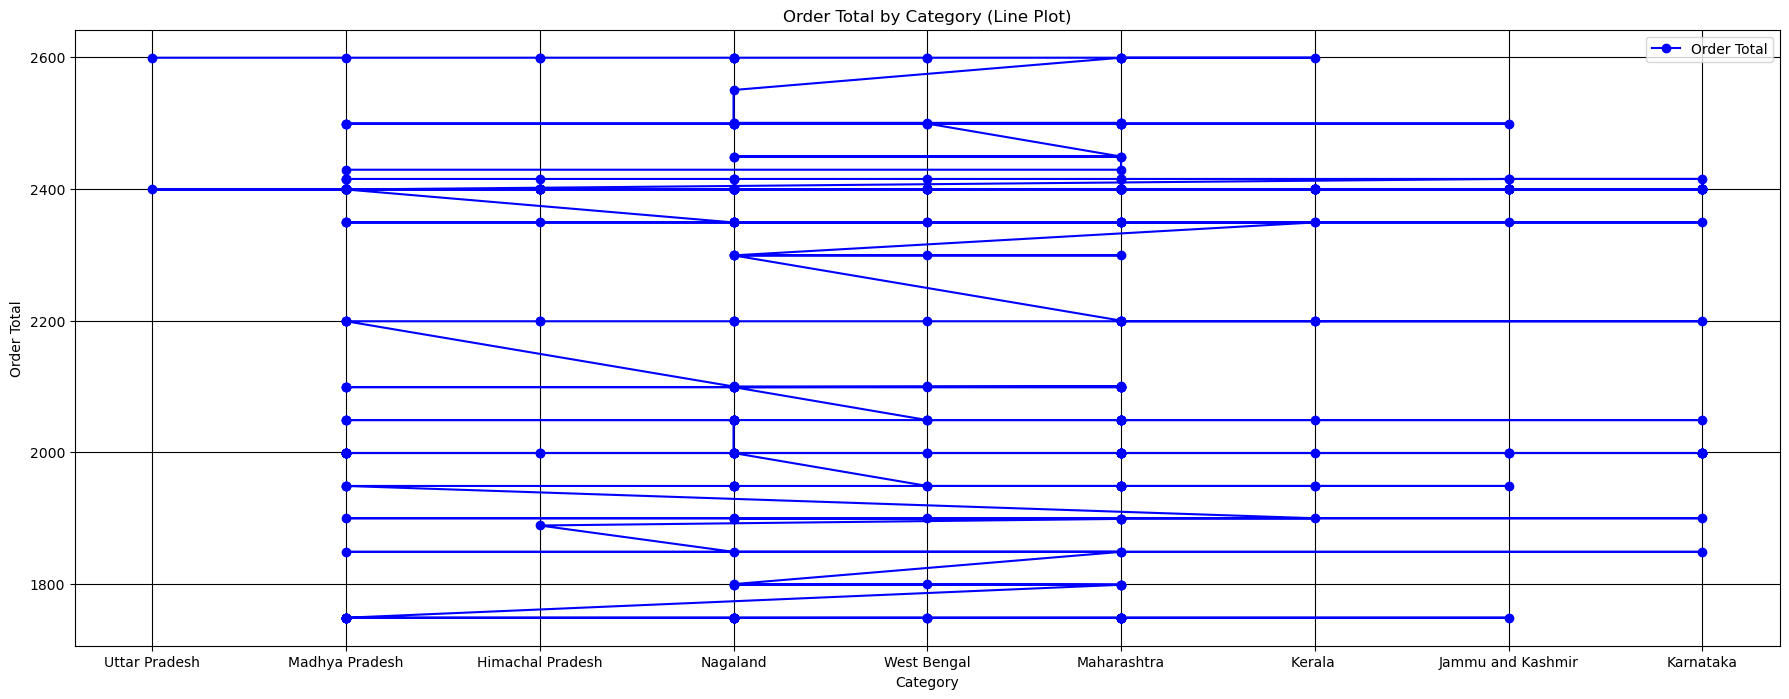

In [67]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a line plot
plt.figure(figsize=(22, 8))
plt.plot(df['State'], df['order_total'], marker='o', color='blue', label='Order Total')
plt.xlabel('States')
plt.ylabel('Order Total')
plt.title('Order Total by States (Line Plot)')
plt.grid(True,color='black')  # Add grid lines for better readability

# Show the plot
plt.legend()
plt.show()


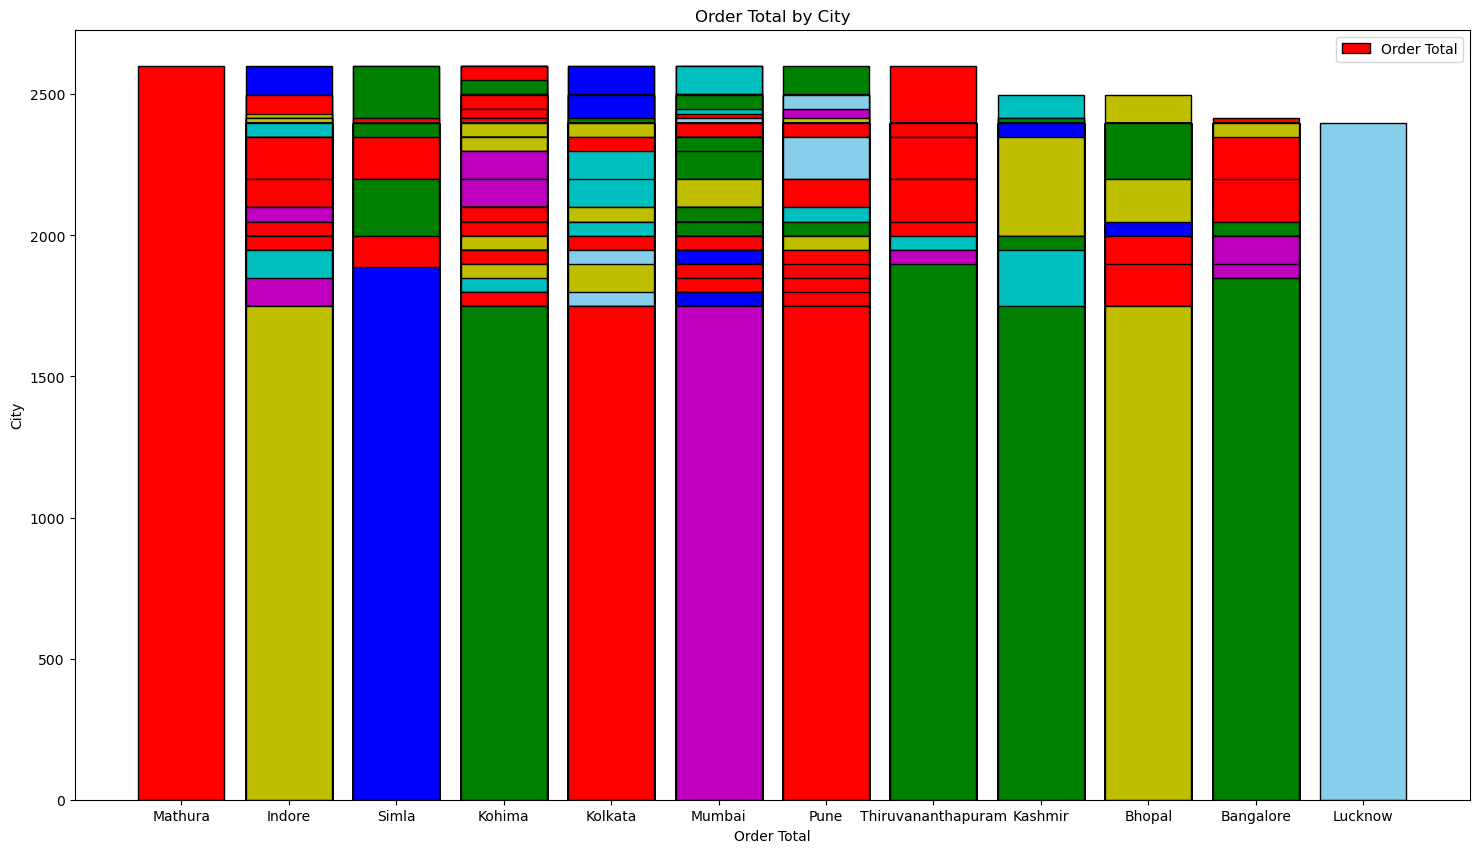

In [68]:
# Create a horizontal bar plot
plt.figure(figsize=(18, 10))
cl=['r','b','c','g','r','m','r','y','skyblue','g','y','r']
plt.bar(df['City'], df['order_total'], color=cl, edgecolor='black')
plt.xlabel('Order Total')
plt.ylabel('City',color='black')
plt.title('Order Total by City')
plt.legend(['Order Total'])
# plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.show()

C:\Users\omkar\AppData\Local\Temp\ipykernel_9248\1009378409.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


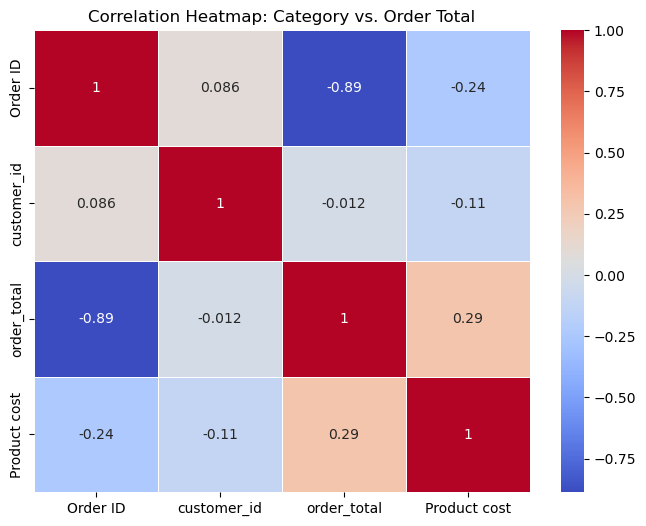

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Category vs. Order Total')
plt.show()


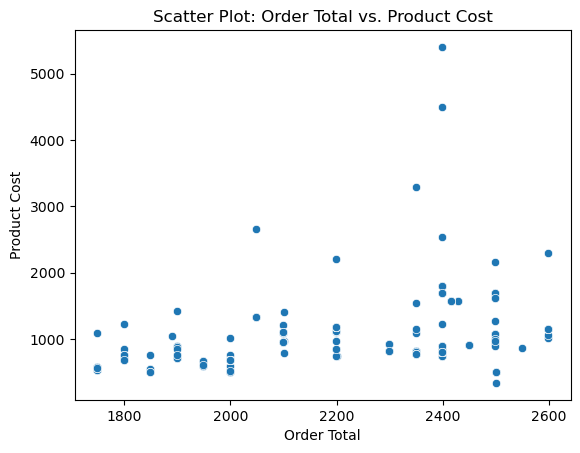

In [46]:


# Load your order data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('Orders_data.csv')

# Data exploration and visualization
sns.scatterplot(x='order_total', y='Product cost', data=df)
plt.xlabel('Order Total')
plt.ylabel('Product Cost')
plt.title('Scatter Plot: Order Total vs. Product Cost')
plt.show()




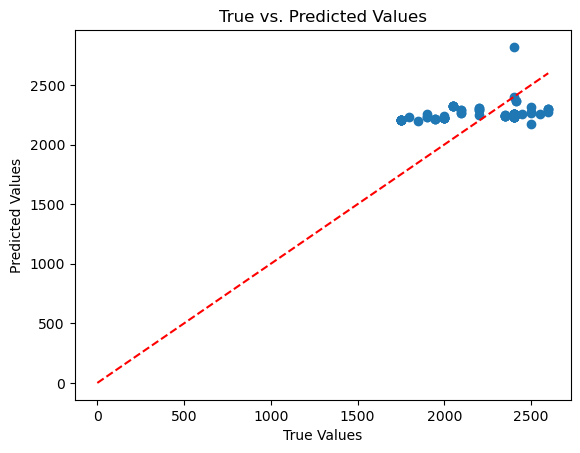

In [47]:
# Split data into train and test sets
X = df[['Product cost']]  # Independent variable(s)
y = df['order_total']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Visualize true vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()


In [48]:

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 215.05
